## Visual representation of soft-max with temperature for knowledge distilation

Using a higher value for T produces a softer
probability distribution over classes.


In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import FloatSlider

In [2]:
def soft_max(array, t=1):
    exps = np.exp(array / t)
    _sum = np.sum(exps)
    return exps / _sum


### Provide output layer vector:

In [26]:
clf_output = np.array([0.02, 0.03, 0.91, 0.01, 0.3, .003, .002, .3])

In [27]:
def update_plot(change):
    ax.relim()
    ax.autoscale_view()
    soft_max_distribution.set_ydata(soft_max(clf_output, slider.value))

In [28]:
slider = FloatSlider(value=1, min=0.1, max=8, step=0.05, description='Temperature')
slider.observe(update_plot, 'value')

<IPython.core.display.Javascript object>


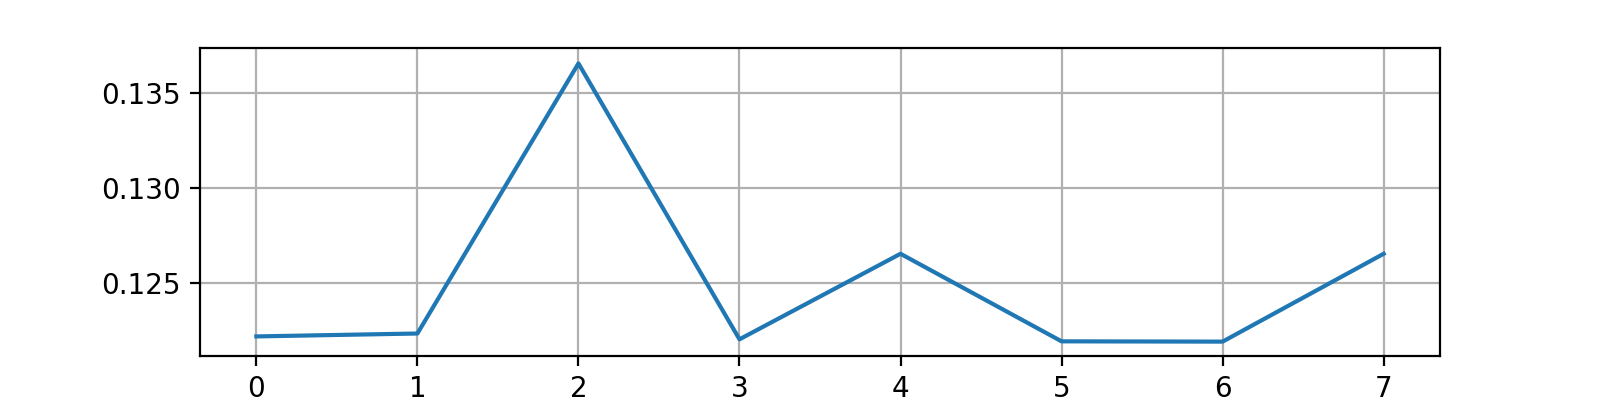

FloatSlider(value=1.0, description='Temperature', max=8.0, min=0.1, step=0.05)

In [29]:
fig = plt.figure(figsize=(8, 2), num='Interactive plot')
ax = fig.add_subplot(111)
soft_max_distribution, = ax.plot(soft_max(clf_output, t = slider.value))

ax.grid()

slider


## Kullback–Leibler divergence - relative entropy
measure of how one probability distribution diverges from a second, expected probability distribution

In [7]:
def dkl(p,q):
    return np.sum(p * np.log2(p/q))

In [8]:
p = clf_output
q = soft_max(clf_output, t = slider.value)

soft_max_dkl = dkl(p,q)

soft_max_dkl

1.4268036197204135

todo: plot: dkl/T